In [33]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2
from torchvision.transforms import ToTensor, transforms
from model import neural_network
import matplotlib.pyplot as plt
import torch
from datasets import load_dataset

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [34]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using mps device


In [51]:
ds = load_dataset("microsoft/cats_vs_dogs", "en-US", split="train")
ds

Dataset({
    features: ['image', 'labels'],
    num_rows: 23410
})

In [52]:
ds[0]

{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>,
 'labels': 0}

0

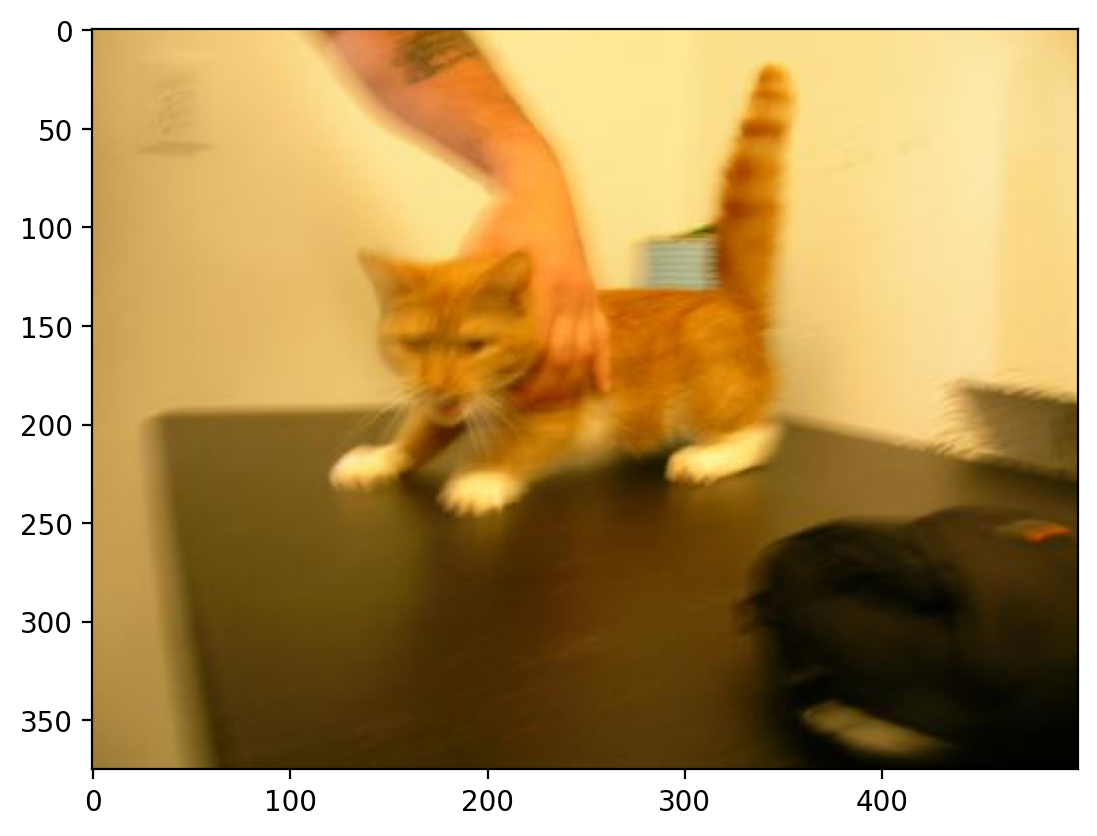

In [53]:
index = 0
plt.imshow(ds[index]['image'])
ds[index]['labels']

In [54]:
transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.1307,), (0.3081,))])

In [55]:
def trfs(examples):
    examples["pixel_values"] = [transform(image) for image in examples["image"]]
    return examples

In [56]:
ds.set_transform(trfs)

In [57]:
print(ds)

Dataset({
    features: ['image', 'labels'],
    num_rows: 23410
})


In [58]:
ds[0]["pixel_values"].shape

torch.Size([3, 375, 500])

In [66]:
dataset = ds.train_test_split(test_size=0.1)
dataset

DatasetDict({
    train: Dataset({
        features: ['image', 'labels'],
        num_rows: 21069
    })
    test: Dataset({
        features: ['image', 'labels'],
        num_rows: 2341
    })
})

In [67]:
dataset['train']['labels']

KeyError: 'image'

In [48]:
X_train = dataset['train']['image']
Y_train = dataset['train']['labels']
X_test = dataset['test']['image']
Y_test = dataset['test']['labels']
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)


KeyboardInterrupt: 